     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
44              56.03        16.30                  62.28         39.73   
93              58.10        14.84                  79.65         43.26   
131             69.78        13.78                  58.00         56.00   
180             37.90         4.48                  24.71         33.42   
27              43.58        16.51                  47.00         27.07   
..                ...          ...                    ...           ...   
1               39.06        10.06                  25.02         29.00   
281             64.26        14.50                  43.90         49.76   
106             65.01         9.84                  57.74         55.18   
227             61.54        19.68                  52.89         41.86   
201             67.51        33.28                  96.28         34.24   

     pelvic_radius  degree_spondylolisthesis class  
44          114.02                     -2.33  

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
44              56.03        16.30                  62.28         39.73   
93              58.10        14.84                  79.65         43.26   
131             69.78        13.78                  58.00         56.00   
180             37.90         4.48                  24.71         33.42   
27              43.58        16.51                  47.00         27.07   
..                ...          ...                    ...           ...   
1               39.06        10.06                  25.02         29.00   
281             64.26        14.50                  43.90         49.76   
106             65.01         9.84                  57.74         55.18   
227             61.54        19.68                  52.89         41.86   
201             67.51        33.28                  96.28         34.24   

     pelvic_radius  degree_spondylolisthesis class  
44          114.02                     -2.33  

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
44              56.03        16.30                  62.28         39.73   
93              58.10        14.84                  79.65         43.26   
131             69.78        13.78                  58.00         56.00   
180             37.90         4.48                  24.71         33.42   
27              43.58        16.51                  47.00         27.07   
..                ...          ...                    ...           ...   
1               39.06        10.06                  25.02         29.00   
281             64.26        14.50                  43.90         49.76   
106             65.01         9.84                  57.74         55.18   
227             61.54        19.68                  52.89         41.86   
201             67.51        33.28                  96.28         34.24   

     pelvic_radius  degree_spondylolisthesis class  
44          114.02                     -2.33  

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
44              56.03        16.30                  62.28         39.73   
93              58.10        14.84                  79.65         43.26   
131             69.78        13.78                  58.00         56.00   
180             37.90         4.48                  24.71         33.42   
27              43.58        16.51                  47.00         27.07   
..                ...          ...                    ...           ...   
1               39.06        10.06                  25.02         29.00   
281             64.26        14.50                  43.90         49.76   
106             65.01         9.84                  57.74         55.18   
227             61.54        19.68                  52.89         41.86   
201             67.51        33.28                  96.28         34.24   

     pelvic_radius  degree_spondylolisthesis class  
44          114.02                     -2.33  

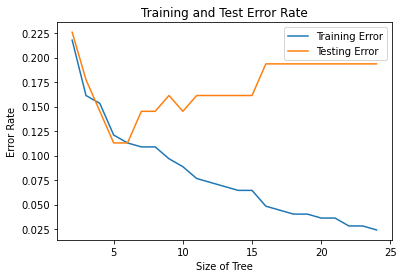

In [3]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import graphviz
import matplotlib.pyplot as plt

def decisionTree(max_leaf_nodes, outputTree, target_depth,RS):
    filepath = "column_3C.dat"
    # filepath = "./out_noindex.csv"
    names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius",
             "degree_spondylolisthesis", "class"]

    df = pd.read_csv(filepath, sep=" ", header=None, names=names)
    df = df.sample(n=len(df), random_state=RS)
    print(df)
    # df = df.sample(n=len(df))
    #
    # compression_opts = dict(method='zip', archive_name='out.csv')
    # df.to_csv('out_index.zip', index=True, compression=compression_opts)
    # df.to_csv('out_noindex.zip', index=False, compression=compression_opts)

    # df = df.reset_index(drop=True)

    numOfRow = len(df.index)

    trainingIndex = numOfRow * 0.8
    trainingIndex = int(trainingIndex)

    training_data = df.iloc[0:trainingIndex, 0:6]
    training_class = df.iloc[0:trainingIndex, -1]

    le = preprocessing.LabelEncoder()
    label = le.fit_transform(training_class)

    # clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    clf = clf.fit(training_data, label)

    if (outputTree):
        dot_data = tree.export_graphviz(clf, out_file=None, filled=True,
                                        feature_names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
                                                       "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"],
                                        class_names=["Hernia", "Normal", "Spondylolisthesis"], rounded=True,
                                        special_characters=True)

        graph_training = graphviz.Source(dot_data)
        graph_training.render('Graph'+str(max_depth), view=False)

    clf_train = clf.predict(training_data)
    a = 1-accuracy_score(label, clf_train)
    if (max_leaf_nodes == target_depth):
        print(1-accuracy_score(label, clf_train))
        print(confusion_matrix(label, clf_train))


    testing_data = df.iloc[trainingIndex:numOfRow + 1, 0:6]
    testing_class = df.iloc[trainingIndex:numOfRow + 1, -1]

    # print(testing_data)

    clf_test = clf.predict(testing_data)
    testing_label = le.fit_transform(testing_class)

    if (max_leaf_nodes == target_depth):
        print(1-accuracy_score(testing_label, clf_test))
        print(confusion_matrix(testing_label, clf_test))


    b = 1-accuracy_score(testing_label, clf_test)

    return a, b


if __name__ == '__main__':
    for RS in range(6, 7):
        train_list = []
        test_list = []
        levels = []
        for max_depth in range(2, 25):
            training_error, test_error = decisionTree(max_depth, True, 5, RS)
            train_list.append(training_error)
            test_list.append(test_error)
            levels.append(max_depth)
        print(train_list)
        print(test_list)
        plt.plot(levels, train_list, label="Training Error")
        plt.plot(levels, test_list, label="Testing Error")
        plt.title("Training and Test Error Rate")
        plt.xlabel("Size of Tree")
        plt.ylabel("Error Rate")
        plt.legend()
        plt.show()